In [1]:
include("../FNC.jl")
m = 60;  n = 60;
X,Y,d = FNC.rectdisc(m,[-2,2],n,[-2,2]);
x = X[:,1]; y = Y[1,:];  # for plotting

Here is the initial condition. The boundary values of $u$ will remain constant.

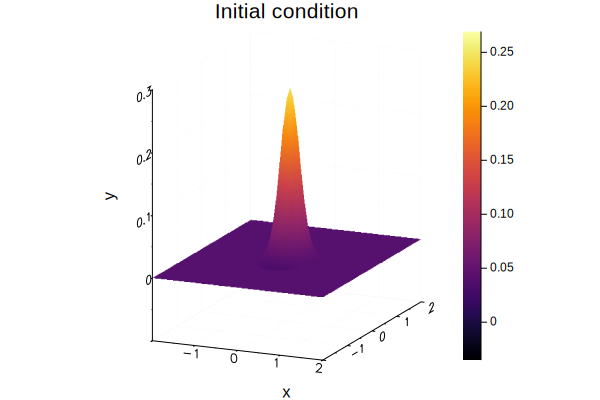

In [2]:
U0 = @. (X+0.2)*exp(-12*(X^2+Y^2))
V0 = zeros(size(U0))

using Plots
surface(x,y,U0,     
    title="Initial condition",    
    xaxis=("x"),yaxis=("y") ) 

The `unpack` function separates the unknowns for $u$ and $v$, applies the boundary conditions on $u$, and returns two functions on the grid.

In [3]:
unpack = function (w)
    numU = (m-1)*(n-1)   # number of unknowns for U
    U = copy(U0)               
    U[@. !d.isbndy] = w[1:numU]  # overwrite the interior
    V = d.unvec( w[numU+1:end] )     # use all values
    return U,V
end

#3 (generic function with 1 method)

The next function drops the boundary values of $u$ and returns a vector of all the unknowns for both components of the solution. It's the inverse of the `unpack` function.

In [4]:
pack = function (U,V)
    w = U[@. !d.isbndy]
    return [ w; V[:] ]
end

#5 (generic function with 1 method)

The following function computes the time derivative of the unknowns. Besides the translation between vector and matrix shapes, it's quite straightforward.

In [5]:
dwdt = function (w,tmp,t)
    U,V = unpack(w) 
    dUdt = V
    dWdt = d.Dxx*U + U*d.Dyy'
    return pack(dUdt,dWdt)
end

#7 (generic function with 1 method)

Since this problem is hyperbolic, not parabolic, a nonstiff integrator like |ode45| is fine and faster than a stiff integrator.

In [6]:
using DifferentialEquations
IVP = ODEProblem(dwdt,pack(U0,V0),(0,3.0))
sol = solve(IVP,alg_hints=[:nonstiff]);

In [7]:
an = @animate for t = range(0,stop=3,length=80)
    surface(x,y,unpack(sol(t)),match_dimensions=true,color=:redsblues,clims=(-0.1,0.1),
        title="Wave equation solution at t=$(round(t,digits=2))")
end
gif(an,"wave2D.gif")

┌ Info: Saved animation to 
│   fn = /Users/driscoll/Dropbox/books/fnc-extras/julia/chapter13/tmp.gif
└ @ Plots /Users/driscoll/.julia/packages/Plots/qh1wV/src/animation.jl:90


Plots.AnimatedGif("/Users/driscoll/Dropbox/books/fnc-extras/julia/chapter13/tmp.gif")